In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('breast cancer.csv')

In [ ]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [ ]:
print(df.tail())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_w

In [ ]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['diagnosis','id'])
Y = df['diagnosis']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print("training feature set shape",X_train.shape)
print("training target set shape",Y_train.shape)
print("testing feature set shape",X_test.shape)
print("testing target set shape",Y_test.shape)

training feature set shape (455, 30)
training target set shape (455,)
testing feature set shape (114, 30)
testing target set shape (114,)


In [ ]:
X = df.drop(columns=['diagnosis', 'id'])
Y = df['diagnosis']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
k_values = range(1, 21)
cv_scores = []

In [ ]:
for k in k_values :
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

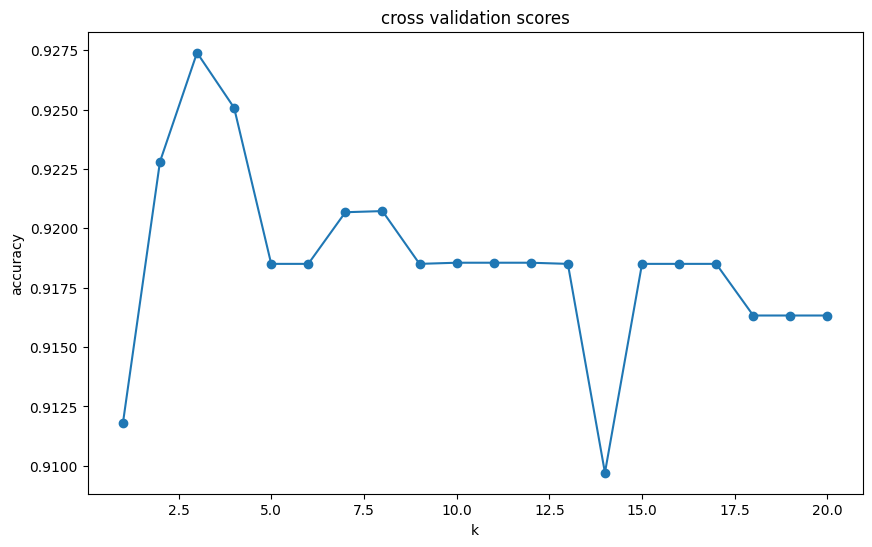

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(k_values,cv_scores,marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('cross validation scores')
plt.show()

In [ ]:
best_k = k_values[cv_scores.index(max(cv_scores))]
print(f"The best k value is: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)

train_accuracy = knn.score(X_train, Y_train)
print(f"Training set accuracy: {train_accuracy:.4f}")

test_accuracy = knn.score(X_test, Y_test)
print(f"Testing set accuracy: {test_accuracy:.4f}")

The best k value is: 3
Training set accuracy: 0.9495
Testing set accuracy: 0.9298


In [ ]:
#Evaluate the model on the testing set
Y_pred = knn.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, pos_label='M')
recall = recall_score(Y_test, Y_pred, pos_label='M')
f1 = f1_score(Y_test, Y_pred, pos_label='M')

In [ ]:
# Print the evaluation metrics
print(f"Testing set accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Testing set accuracy: 0.9298
Precision: 0.9268
Recall: 0.8837
F1 Score: 0.9048


In [ ]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred, target_names=['B', 'M']))


Classification Report:
              precision    recall  f1-score   support

           B       0.93      0.96      0.94        71
           M       0.93      0.88      0.90        43

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

